<a href="https://colab.research.google.com/github/priscilaek/priscilaek/blob/main/Pris_ProyectoM7_Tecnicas_Avanzadas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Nombre: Priscila Elías Kana

## **Bootcamp: Ciencia de Datos e Inteligencia Artificial**
## **Proyecto del Módulo 7: Técnicas avanzadas para ciencia de datos y empleabilidad**

Hola, ya es el último proyecto, has avanzado y aprendido mucho hasta acá. ¡Muchas felicidades!

Es hora de poner en práctica todo lo que hemos aprendido a lo largo de nuestra travesía.

Lee el proyecto y revisa con cuidado cada una de las instrucciones. Procura plasmar todo tu potencial para que lo concluyas de manera sobresaliente.

¡Éxito!

# Objetivos
- Aplicar con éxito todos los conocimientos que has adquirido a lo largo del Bootcamp.
- Consolidar las técnicas de limpieza, entrenamiento, graficación y ajuste a modelos de *Machine Learning*.
- Generar una API que brinde predicciones como resultado a partir de datos enviados.


# Proyecto

1. Selecciona uno de los siguientes *datasets*:
  - Imágenes de rayos X de pecho para detectar neumonía: https://www.kaggle.com/datasets/paultimothymooney/chest-xray-pneumonia
  - *Reviews* de aplicaciones de la Google Play Store: https://www.kaggle.com/datasets/lava18/google-play-store-apps
  - Estadísticas demográficas de los ganadores del premio Oscar de la Academia: https://www.kaggle.com/datasets/fmejia21/demographics-of-academy-awards-oscars-winners
  - Aspiraciones profesionales de la generación Z: https://www.kaggle.com/datasets/kulturehire/understanding-career-aspirations-of-genz

Cada uno representa un *dataset*, un problema y una forma diferente de abordarlo. Tu tarea es identificar las técnicas y modelos que podrías usar para tu proyecto.

2. Debes hacer un análisis exploratorio y limpieza de los datos. Usa las ténicas que creas convenientes.

3. Entrena el modelo de *Machine Learning*, procesamiento de lenguaje natural o red neuronal que creas adecuado.

4. Genera por lo menos dos gráficas y dos métricas de rendimiento; explica las puntuaciones de rendimiento que amerite tu problema. Todas las gráficas de rendimiento que realices deben tener leyendas, colores y títulos personalizados por ti. 

  - Además, antes de subir el modelo a "producción", deberás realizar un proceso de ensambles (*ensemblings*) y de ajuste de hiperparámetros o *tuning* para intentar mejorar la precisión y disminuir la varianza de tu modelo.

5. Construye una API REST en la que cualquier usuario pueda mandar datos y que esta misma devuelva la predicción del modelo que has hecho. La API debe estar en la nube, ya sea en un servicio como Netlify o Ngrok, para que pueda ser consultada desde internet.

6. Genera una presentación del problema y del modelo de solución que planteas. Muestra gráficas, datos de rendimiento y explicaciones. Esta presentación debe estar enfocada a personas que no sepan mucho de ciencia de datos e inteligencia artificial.

7. **Solamente se recibirán trabajos subidos a tu cuenta de GitHub con un README.md apropiado que explique tu proyecto**. 

## Criterios de evaluación

| Actividad | Porcentaje | Observaciones | Punto parcial
| -- | -- | -- | -- |
| Actividad 1. Limpieza y EDA | 20 | Realiza todas las tareas necesarias para hacer el EDA y la limpieza correcta, dependiendo de la problemática. Debes hacer como mínimo el análisis de completitud, escalamiento (si aplica) y tokenización (si aplica). | Realizaste solo algunas tareas de exploración y limpieza y el modelo se muestra aún con oportunidad de completitud, escalamiento y/o mejora. |
| Actividad 2. Entrenamiento del modelo | 20 | Elige el modelo y algoritmo adecuados para tu problema, entrénalo con los datos ya limpios y genera algunas predicciones de prueba. | No has realizado predicciones de prueba para tu modelo de ML y/o tu modelo muestra una precisión menor al 60 %. |
| Actividad 3. Graficación y métricas | 20 | Genera por lo menos dos gráficas y dos muestras de métricas que permitan visualizar el rendimiento y precisión del modelo que construiste. Además, realizaste los procesos de *tuning* y ensambles adecuados para tu problema. | Las gráficas no tienen leyendas y colores customizados, solo muestras una gráfica o no realizaste el *tuning* de hiperparámetros.
| Actividad 4. API REST | 20 | Generaste con éxito un *link* público en el que, por método POST, se puede mandar información y la API REST devuelve una predicción junto con el porcentaje de confianza de esta misma. | N/A
| Actividad 5. Presentación | 20 | Genera una presentación en la que establezcas como mínimo: el problema, proceso de solución, metodologías usadas, gráficas de rendimiento, demostración del modelo y aprendizajes obtenidos. Debes redactarla con términos que pueda entender cualquier persona, no solo científicos de datos. | La presentación no expone con claridad o en términos coloquiales el proceso de creación del modelo, sus ventajas y muestras de rendimiento.

**Mucho éxito en tu camino como Data Scientist.**

##Nombre: Priscila Elías Kana

## Libraries (Contiene las librerias a usar)

In [71]:
# Importamos bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.stats.power import NormalIndPower
from scipy.stats import norm

from google.colab import drive
drive.mount('/content/drive')
#preprocessing
from sklearn.preprocessing import LabelEncoder

# Vamos a usar un clasificador de bosque aleatorio:
from sklearn.ensemble import RandomForestClassifier
# Grafica
import matplotlib.pyplot as plt
import seaborn as sns

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


##Carga de los datos

In [41]:
CSV_PATH = "/content/drive/MyDrive/UCamp/googleplaystore_user_reviews.csv"

In [42]:
df = pd.read_csv(CSV_PATH)

## Limpieza y EDA

In [43]:
df.head(5)

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64295 entries, 0 to 64294
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     64295 non-null  object 
 1   Translated_Review       37427 non-null  object 
 2   Sentiment               37432 non-null  object 
 3   Sentiment_Polarity      37432 non-null  float64
 4   Sentiment_Subjectivity  37432 non-null  float64
dtypes: float64(2), object(3)
memory usage: 2.5+ MB


In [45]:
df.isnull().sum()

App                           0
Translated_Review         26868
Sentiment                 26863
Sentiment_Polarity        26863
Sentiment_Subjectivity    26863
dtype: int64

In [46]:
df = df.dropna()

In [47]:
df.isnull().sum()

App                       0
Translated_Review         0
Sentiment                 0
Sentiment_Polarity        0
Sentiment_Subjectivity    0
dtype: int64

In [48]:
df.head(5)

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000
5,10 Best Foods for You,Best way,Positive,1.00,0.300000


In [49]:
df.dtypes

App                        object
Translated_Review          object
Sentiment                  object
Sentiment_Polarity        float64
Sentiment_Subjectivity    float64
dtype: object

In [50]:
# Codificación One hot encoding para variables categóricas
# Creación Dymmies:
dummies = pd.get_dummies(df.Sentiment)

In [51]:
# Agregamos el dataset de los dummies con el dataset original:
new_df = pd.concat([df,dummies],axis='columns')
print(type(new_df))

<class 'pandas.core.frame.DataFrame'>


In [52]:
new_df.columns

Index(['App', 'Translated_Review', 'Sentiment', 'Sentiment_Polarity',
       'Sentiment_Subjectivity', 'Negative', 'Neutral', 'Positive'],
      dtype='object')

In [53]:
new_df.sample(5)

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity,Negative,Neutral,Positive
32554,DSLR Camera Hd Ultra Professional,Nice,Positive,0.600000,1.000000,0,0,1
55774,Google Fit - Fitness Tracking,First-class garbage. Calories burned disappear...,Negative,-0.100000,0.600000,1,0,0
18670,BukuBayi - Perkembangan Bayi,Remember it,Neutral,0.000000,0.000000,0,1,0
63353,Honkai Impact 3rd,"I love game. The animation super awesome, And ...",Positive,0.250345,0.604499,0,0,1
63413,Hopper - Watch & Book Flights,I saved much money friends mad paid flight me!!!!,Negative,-0.400000,0.600000,1,0,0


In [54]:
# Se elimina la columna categorica anterior
new_df.drop(['Sentiment'],axis='columns',inplace=True)
print(new_df.head(10))
new_df.info()

                      App                                  Translated_Review  \
0   10 Best Foods for You  I like eat delicious food. That's I'm cooking ...   
1   10 Best Foods for You    This help eating healthy exercise regular basis   
3   10 Best Foods for You         Works great especially going grocery store   
4   10 Best Foods for You                                       Best idea us   
5   10 Best Foods for You                                           Best way   
6   10 Best Foods for You                                            Amazing   
8   10 Best Foods for You                               Looking forward app,   
9   10 Best Foods for You              It helpful site ! It help foods get !   
10  10 Best Foods for You                                          good you.   
11  10 Best Foods for You  Useful information The amount spelling errors ...   

    Sentiment_Polarity  Sentiment_Subjectivity  Negative  Neutral  Positive  
0                 1.00                0.5

In [59]:
#Se eliminan las columnas categoricas de valor único
new_df = new_df.drop(columns=['Translated_Review'], axis=1)

In [60]:
label_encoder_reviews = LabelEncoder()

In [63]:
for col in new_df.columns:
    col_type = new_df[col].dtype

    if col_type == 'object':
        values = new_df[col].values
        labels = label_encoder_reviews.fit_transform(values)
        mapping = dict(enumerate(label_encoder_reviews.classes_))
        #print(values, "\n", labels, "\n", label_encoder.classes_, "\n", mapping, "\n\n")
        new_df[col] = label_encoder_reviews.transform(values)
        print(f"Mapping for {col}: {mapping}")

Mapping for App: {0: '10 Best Foods for You', 1: '104 找工作 - 找工作 找打工 找兼職 履歷健檢 履歷診療室', 2: '11st', 3: '1800 Contacts - Lens Store', 4: '1LINE – One Line with One Touch', 5: '2018Emoji Keyboard 😂 Emoticons Lite -sticker&gif', 6: '21-Day Meditation Experience', 7: '2Date Dating App, Love and matching', 8: '2GIS: directory & navigator', 9: '2RedBeans', 10: '2ndLine - Second Phone Number', 11: '30 Day Fitness Challenge - Workout at Home', 12: '365Scores - Live Scores', 13: '3D Live Neon Weed Launcher', 14: '4 in a Row', 15: '4K Wallpapers and Ultra HD Backgrounds', 16: '591房屋交易-租屋、中古屋、新建案、實價登錄、別墅透天、公寓套房、捷運、買房賣房行情、房價房貸查詢', 17: '591房屋交易-香港', 18: '7 Cups: Anxiety & Stress Chat', 19: '7 Day Food Journal Challenge', 20: '7 Minute Workout', 21: '7 Weeks - Habit & Goal Tracker', 22: '8 Ball Pool', 23: '850 Sports News Digest', 24: '8fit Workouts & Meal Planner', 25: '95Live -SG#1 Live Streaming App', 26: 'A Call From Santa Claus!', 27: 'A Word A Day', 28: 'A&E - Watch Full Episodes of TV Shows', 29:

In [64]:
new_df.sample(5)

,App,Sentiment_Polarity,Sentiment_Subjectivity,Negative,Neutral,Positive
9499,143,0.000000,0.750000,0,1,0
50393,681,0.003333,0.424444,0,0,1
55731,746,0.218750,0.750000,0,0,1
40611,538,-0.206667,0.578333,1,0,0
39442,530,0.253810,0.401905,0,0,1


## Entrenamiento del modelo

In [67]:
# Dividimos el dataset en características y clase target:
x = new_df[new_df.columns.difference(['Positive'])]
y = new_df['Positive']
       
classifier = RandomForestClassifier()
classifier.fit(x, y)

RandomForestClassifier()

In [68]:
"""
Hacemos un head a X porque, a la hora de implementar nuestro 
modelo en la API REST, es necesario enviar los datos en el mismo orden en el que
se entrenaron:
"""
x.head()

,App,Negative,Neutral,Sentiment_Polarity,Sentiment_Subjectivity
0,0,0,0,1.00,0.533333
1,0,0,0,0.25,0.288462
3,0,0,0,0.40,0.875000
4,0,0,0,1.00,0.300000
5,0,0,0,1.00,0.300000


## Graficación y Métricas

In [70]:
corr_reviews = new_df.corr()

In [72]:
corr_reviews

,App,Sentiment_Polarity,Sentiment_Subjectivity,Negative,Neutral,Positive
App,1.000000,-0.002510,0.005490,-0.010573,-0.003352,0.011554
Sentiment_Polarity,-0.002510,1.000000,0.261587,-0.664561,-0.207315,0.723858
Sentiment_Subjectivity,0.005490,0.261587,1.000000,0.086721,-0.635292,0.381543
Negative,-0.010573,-0.664561,0.086721,1.000000,-0.212943,-0.712001
Neutral,-0.003352,-0.207315,-0.635292,-0.212943,1.000000,-0.534458
Positive,0.011554,0.723858,0.381543,-0.712001,-0.534458,1.000000


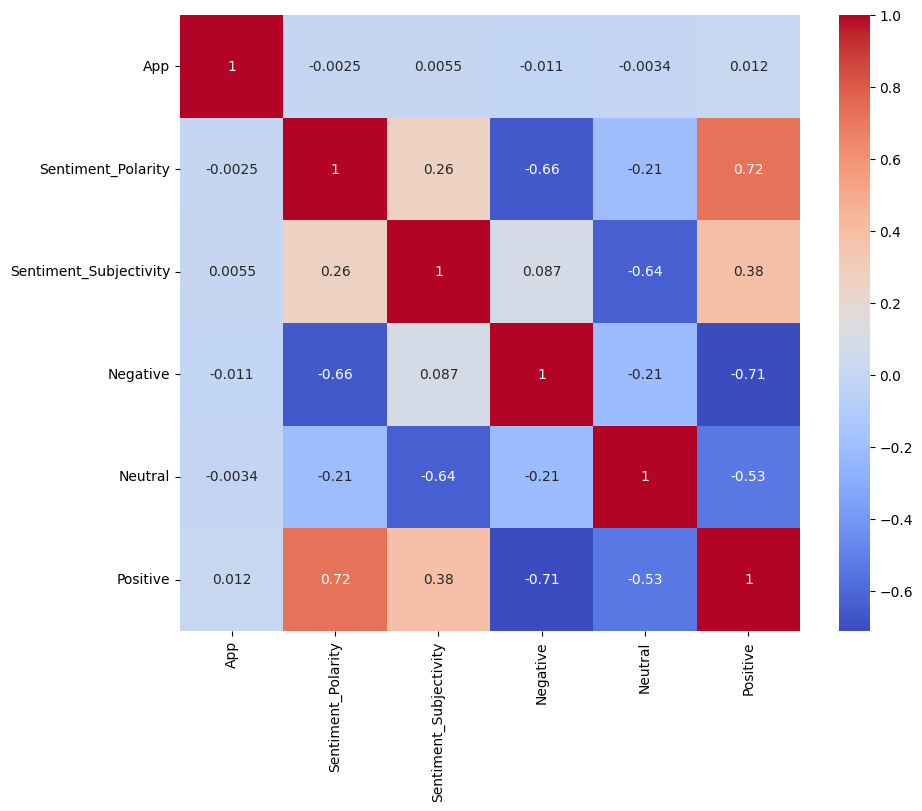

In [73]:
fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(corr_reviews, annot=True, cmap='coolwarm', ax=ax)
plt.show()

In [76]:
corr_reviews['Positive'].sort_values(ascending= False)

Positive                  1.000000
Sentiment_Polarity        0.723858
Sentiment_Subjectivity    0.381543
App                       0.011554
Neutral                  -0.534458
Negative                 -0.712001
Name: Positive, dtype: float64

Se muestra que el sentimiento de polaridad es el que esta mas correlacionado con los sentimientos positivos.

## API REST

Se crea el archivo pkl que se guardara en una ubicacion local.

In [78]:
import joblib

joblib.dump(classifier, '/content/drive/MyDrive/UCamp/positive.pkl')

['/content/drive/MyDrive/UCamp/positive.pkl']

Se actualiza el archivo app.py con el correspondiente pkl

In [ ]:
from flask import Flask
from flask import request
import pandas as pd
import joblib


app = Flask(__name__)

@app.route('/predice', methods=['POST'])
def predict():
    json_ = request.json
    query_df = pd.DataFrame(json_, index=[0])
    query = pd.get_dummies(query_df)
    
    classifier = joblib.load('positive.pkl')
    prediction = classifier.predict(query)

    if prediction[0] :
        return "TRUE: El usuario tiene un sentimiento positivo"
    else :
        return "FALSE: El usuario tiene un sentimiento negativo"


if __name__ == "__main__":
    app.run(port=8000, debug=True)

El endpoint evaluado es: http://127.0.0.1:5000/predice

El request a evaluar:

{
    "App": 0,
    "Negative":  1,
    "Neutral": 0.9,
    "Sentiment_Polarity": 0.1,
    "Sentiment_Subjectivity": 0.1
}

Se obtiene como respuesta: 
Status: 200 OK

FALSE: El usuario tiene un sentimiento negativo

Otro request a evaluar:

{
    "App": 0,
    "Negative":  1,
    "Neutral": 0.5,
    "Sentiment_Polarity": 0.8,
    "Sentiment_Subjectivity": 0.6
}

Se obtiene como respuest: 
Status: 200 OK

TRUE: El usuario tiene un sentimiento positivo